# Bounding Boxes in Matplotlib

In [5]:
import requests
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt

## Getting image from url address:

Image Size: (500, 681)


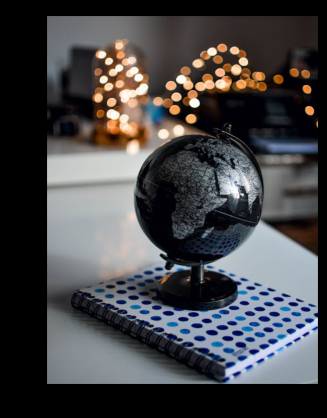

In [243]:
url = 'https://images.pexels.com/photos/1236421/pexels-photo-1236421.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500'
response = requests.get(url,stream=True)
im = Image.open(response.raw)

# Create figure and axes
fig, ax = plt.subplots()
ax.imshow(im)

# Display the image
print('Image Size: {}'.format(im.size))
fig.set_facecolor('black')

## Adding Patches to an Image

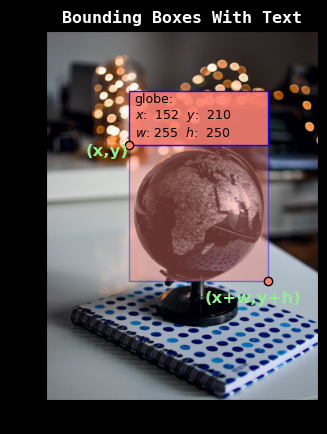

In [244]:
fig, ax = plt.subplots()
fig.set_facecolor('black')
ax.imshow(im)

x,y = (152,210)
w,h = (255,250)

# Create a Rectangle patch
rect = patches.Rectangle((x,y),
                         w,h,
                         linewidth=1,
                         edgecolor='blue',
                         facecolor='salmon',
                         alpha=.4,
                         label='Globe')

rect_box = patches.Rectangle((x,y),
                         w,h,
                         linewidth=1,
                         edgecolor='blue',
                            facecolor=None,
                         alpha=0,
                         label='box')

rect_title = patches.Rectangle((x,y-100),
                               w,100,
                               linewidth=1,
                               edgecolor='blue',
                               facecolor='salmon',
                               alpha=0.9)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_box)
ax.add_patch(rect_title)


ax.text(centerx,centery+5,r'globe:'+'\n'+
        r'$x$:  {}  $y$:  {}'.format(x,y)+'\n'+
        r'$w$: {}  $h$:  {}'.format(w,h),
        color='black',
        size=9,
        family='sans-serif',
        fontweight='medium')

ax.scatter([x,x+w],
           [y,y+h],
           color='salmon',
           edgecolor='k')

ax.text(centerx-90,centery+40,
        '(x,y)',
        color='lightgreen',
        family='sans-serif',
        size=12,
        fontweight='bold')

ax.text(x+w-w/2.2,y+h+40,
        '(x+w,y+h)',
        color='lightgreen',
        size=12,
        family='sans-serif',
        fontweight='bold')

ax.set_title('Bounding Boxes With Text',
             color='white',
             family='monospace',
             fontweight='heavy')
plt.show()

## Extracting RGB Channels from an Image

In [393]:
import numpy as np

In [301]:
imArr = np.array(im)
imArr.shape
W,H = imArr.shape[0],imArr.shape[1]
zeros = np.zeros((W,H))
R, G, B = [np.expand_dims(imArr[:,:,i],-1) for i in range(3)]
[red,green,blue] = [np.dstack([R,zeros,zeros]).astype('float32')/255,
                    np.dstack([zeros,G,zeros]).astype('float32')/255,
                    np.dstack([zeros,zeros,B]).astype('float32')/255]

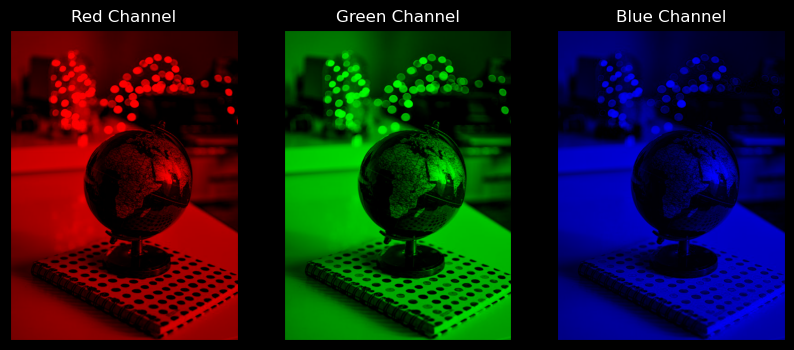

In [471]:
channels = [red,green,blue]
titles = ['Red','Green','Blue']
titles = [t + ' Channel' for t in titles]
fig, ax = plt.subplots(1,3,figsize=(10,16))
fig.set_facecolor('black')

for i in range(3):
    ax[i].imshow(channels[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(titles[i],color='white')
    

## Using Image Filters

In [474]:
import cv2 as cv
from cv2 import Sobel, Laplacian

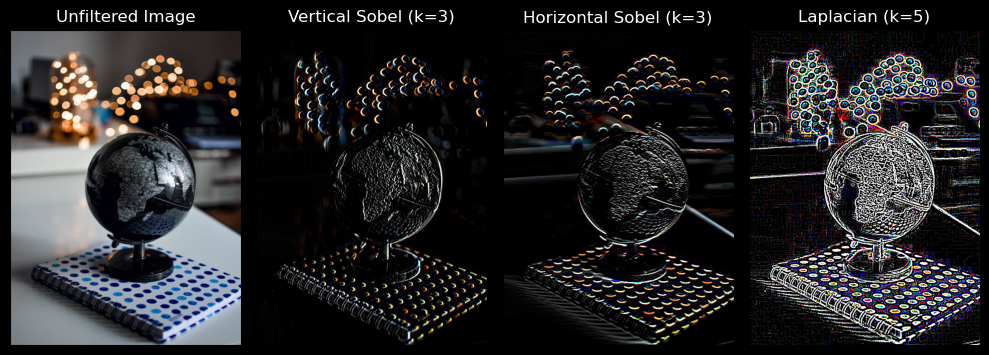

In [487]:
fig,ax = plt.subplots(1,4,figsize=(10,18))
sobel_v= Sobel(src=imArr,ddepth=-1,ksize=3,dx=1,dy=0)
sobel_h= Sobel(src=imArr,ddepth=-1,ksize=3,dx=0,dy=1)
laplace = Laplacian(src=imArr, ddepth=-1, ksize=5)
filters = [sobel_v,sobel_h, laplace]
fig.set_facecolor('black')
filter_names=['Vertical Sobel (k=3)', 'Horizontal Sobel (k=3)', 'Laplacian (k=5)']
ind = [i for i in range(3)]
ax[0].imshow(im)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Unfiltered Image',
                size=12,
                fontweight='medium',
                color='white')

for i in ind:
    ax[i+1].imshow(filters[i])
    ax[i+1].set_xticks([])
    ax[i+1].set_yticks([])
    ax[i+1].set_title(filter_names[i],
                      size=12,
                      color='white',
                      fontweight='medium')
plt.tight_layout()
plt.show()

## Color Channels for Filtered Images

In [488]:
cols=[r_im,g_im,b_im]=([laplace[:,:,i] for i in range(3)])
im_r,im_g,im_b = [np.expand_dims(pic,-1) for pic in cols]
im_r = np.dstack([im_r,zeros,zeros]).astype('float32')/255
im_g = np.dstack([zeros,im_g,zeros]).astype('float32')/255
im_b = np.dstack([zeros,zeros,im_b]).astype('float32')/255

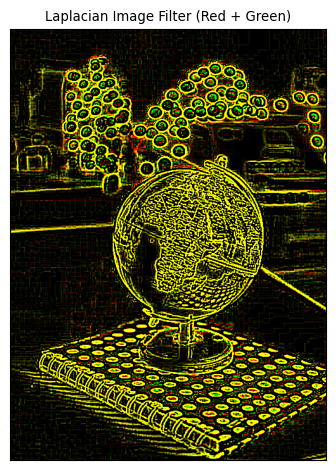

In [489]:
plt.imshow((im_g+im_r))
plt.xticks([])
plt.yticks([])
plt.title("Laplacian Image Filter (Red + Green)",size=9.5)
plt.tight_layout()
plt.show()